# 01 — Data Ingestion & Validation (SET50 + Sample Stocks)
ขั้นตอนนี้ดึงข้อมูลราคาจาก Yahoo Finance (yfinance) และตรวจคุณภาพข้อมูลแบบเบื้องต้น

In [1]:

# --- Setup (run once per session) ---
%pip -q install yfinance pandas numpy matplotlib ta


  Preparing metadata (setup.py) ... done


In [6]:

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# --- User params ---
INDEX_TICKER = "^SET.BK"          # SET index
TICKERS = ["PTT.BK","AOT.BK","SCB.BK","CPALL.BK","ADVANC.BK"]  # sample portfolio universe
START = "2015-01-01"
END   = "2025-08-22"

print("Params:", INDEX_TICKER, TICKERS, START, END)


Params: ^SET.BK ['PTT.BK', 'AOT.BK', 'SCB.BK', 'CPALL.BK', 'ADVANC.BK'] 2015-01-01 2025-08-22


In [8]:

# --- Download index data ---
idx = yf.download(INDEX_TICKER, start=START, end=END)
idx = idx[['Open','High','Low','Close','Close','Volume']].dropna(how="all")
print(idx.head())
print("Index rows:", len(idx))


/tmp/ipython-input-1216866408.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  idx = yf.download(INDEX_TICKER, start=START, end=END)
[*********************100%***********************]  1 of 1 completed

Price              Open         High          Low        Close               \
Ticker          ^SET.BK      ^SET.BK      ^SET.BK      ^SET.BK      ^SET.BK   
Date                                                                          
2015-01-05  1499.699951  1502.099976  1482.869995  1483.250000  1483.250000   
2015-01-06  1467.969971  1478.349976  1459.219971  1477.579956  1477.579956   
2015-01-07  1478.839966  1500.829956  1478.260010  1500.750000  1500.750000   
2015-01-08  1514.900024  1523.319946  1514.180054  1521.619995  1521.619995   
2015-01-09  1529.500000  1531.209961  1522.750000  1529.420044  1529.420044   

Price         Volume  
Ticker       ^SET.BK  
Date                  
2015-01-05   7129200  
2015-01-06  31337800  
2015-01-07  12400600  
2015-01-08  18000300  
2015-01-09  32278600  
Index rows: 2577


In [10]:

# --- Download multiple stocks (Adj Close) ---
prices = yf.download(TICKERS, start=START, end=END)["Close"]
prices = prices.dropna(how="all")
print(prices.head())
print("Price matrix shape:", prices.shape)

# Save raw data for reuse (optional)
idx.to_csv("idx_raw.csv")
prices.to_csv("prices_raw.csv")
print("Saved idx_raw.csv and prices_raw.csv")


/tmp/ipython-input-147263995.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  prices = yf.download(TICKERS, start=START, end=END)["Close"]
[*********************100%***********************]  5 of 5 completed


Ticker       ADVANC.BK     AOT.BK   CPALL.BK     PTT.BK  SCB.BK
Date                                                           
2015-01-05  155.784134  24.602858  35.468834  19.434513     NaN
2015-01-06  154.532852  24.512741  35.260189  19.928085     NaN
2015-01-07  158.286667  25.504065  36.094749  20.606749     NaN
2015-01-08  156.409775  26.044786  36.094749  20.976929     NaN
2015-01-09  155.158508  26.225027  35.260189  20.853533     NaN
Price matrix shape: (2583, 5)
Saved idx_raw.csv and prices_raw.csv


## Quick validation

Missing (Index):
 Price   Ticker 
Open    ^SET.BK    0
High    ^SET.BK    0
Low     ^SET.BK    0
Close   ^SET.BK    0
        ^SET.BK    0
Volume  ^SET.BK    0
dtype: int64

Missing (Prices top 10):
 Ticker
SCB.BK       1774
ADVANC.BK       0
AOT.BK          0
CPALL.BK        0
PTT.BK          0
dtype: int64


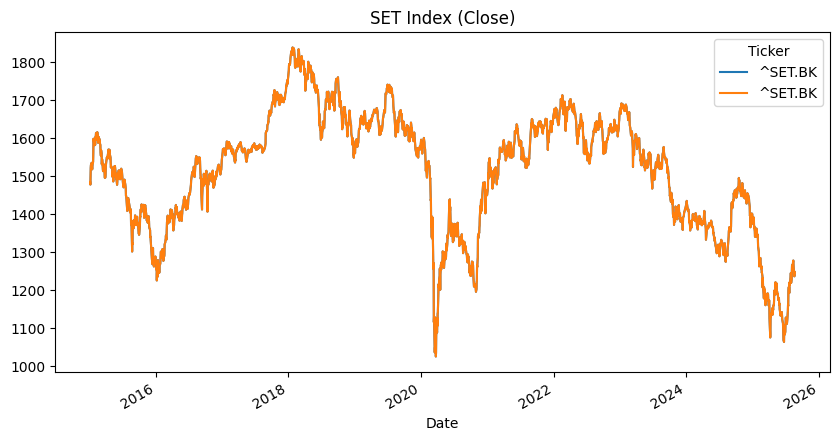

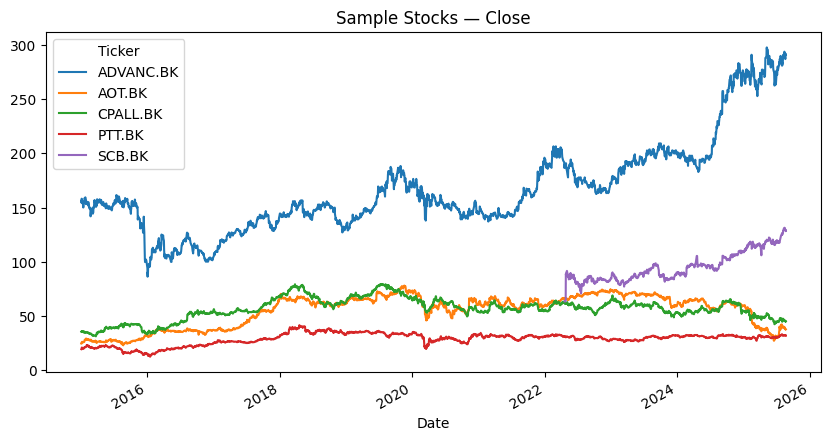

Saved idx_clean.csv and prices_clean.csv


In [13]:

# Missing values summary
miss_idx = idx.isna().sum()
miss_prices = prices.isna().sum().sort_values(ascending=False)

print("Missing (Index):\n", miss_idx)
print("\nMissing (Prices top 10):\n", miss_prices.head(10))

# Forward-fill small gaps
idx = idx.ffill()
prices = prices.ffill()

# Basic plots
idx["Close"].plot(title="SET Index (Close)", figsize=(10,5))
plt.show()

prices.plot(figsize=(10,5), title="Sample Stocks — Close")
plt.show()

# Save cleaned copies
idx.to_csv("idx_clean.csv")
prices.to_csv("prices_clean.csv")
print("Saved idx_clean.csv and prices_clean.csv")


> ✅ ผลลัพธ์ที่ควรได้: idx_clean.csv, prices_clean.csv + สรุป missing + กราฟเบื้องต้น